# Introduction to dataset- Gun Violence Data

Source: https://www.kaggle.com/jameslko/gun-violence-data

Kaggle has made a record of more than 260k gun violence incidents, with detailed information about each incident, available in CSV format. This makes it easier for data practitioners and statisticians to study gun violence and make informed predictions about future trends. Here, we used the data to analyze some trends using basic techniques of data mining.

### Group:
1.Ajmera Himanshu,

2.Jawed Daanish,

3.Sawant Dipali.

### Geography:  
United States

### Time period: 
The CSV file contains data for all recorded gun violence incidents in the US between January 2013 and March 2018, inclusive.


# Loading required libraries

In [1]:
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
import plotly.graph_objs as go


import plotly.plotly as py
from plotly import tools
import seaborn as sns
import pandas as pd
import string, os, random
import calendar

init_notebook_mode(connected=True)
punc = string.punctuation

# Read the data

Read the dataset using pandas read_csv function. As data includes a column called "date" so we will parse it while the time of reading.

In [2]:
df = pd.read_csv("gun-violence-data_01-2013_03-2018.csv",parse_dates = ['date'])

## Understanding the data:
To get familiarity with data and features, which helps us in deciding what kind of analysis we can perform. 

In [3]:
df.head(5)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


# Column Metrics

To analyze the metadata and data type, before performing further operations.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null datetime64[ns]
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude            

# Create Additional Features


To divide the date into year, month, monthday, weekday we used 'Series.dt.date'.

In [5]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['monthday'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

# Exploration

In [6]:
# function to aggregate and return keys and values
def create_stack_bar_data(col):
    aggregated = df[col].value_counts()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values

## Number of Gun Violence Incidents in US

In [7]:
x1, y1 = create_stack_bar_data('date')
x1 = x1[:-1]
y1 = y1[:-1]
trace = go.Bar(x=x1, y=y1, opacity=1, marker=dict(color='rgpa(10, 220, 150, 0.6)'))
layout = dict(height=500, title='Number of Gun Violence Incidents in US', legend=dict(orientation="v"));

fig = go.Figure(data=[trace], layout=layout);
iplot(fig);

                                                 # Conclusion: 
As we can observe, number of Gun Violence Incidents throughout the years touched the peak in mid 2017, while these were low before 2014

## Number of Gun Violence Incidents on weekdays

In [8]:
x1, y1 = create_stack_bar_data('weekday')
x1 = x1[:-1]
y1 = y1[:-1]
trace = go.Bar(x=x1, y=y1, opacity=0.75, marker=dict(color='rgba(10, 220, 150, 0.6)'))
layout = dict(height=400, title='Number of Gun Violence Incidents on weekdays', legend=dict(orientation="v"));

fig = go.Figure(data=[trace], layout=layout);
iplot(fig);

                                                   # Conclusion:
It's interesting that almost zero incident happened on 4th day of week. Many times data give interesting and suspicious results. But yes according to data you are safe on 4th day.

# Which State had the highest number of Gun Violences

## US-Map 

In [9]:
states_df = df['state'].value_counts()

statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values

scl = [[0.0, 'rgb(49,54,149)'],[0.2, 'rgb(69,117,180)'],[0.4, 'rgb(171,217,233)'],\
            [0.6, 'rgb(254,224,144)'],[0.8, 'rgb(244,109,67)'],[1.0, 'rgb(165,0,38)']]

state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI', 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}
statesdf['state_code'] = statesdf['state'].apply(lambda x : state_to_code[x])

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = statesdf['state_code'],
        z = statesdf['counts'],
        locationmode = 'USA-states',
        text = statesdf['state'],
        marker = dict(
            line = dict (
                color = 'rgp(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Gun Violence Incidents")
        ) ]

layout = dict(
        title = 'Gun Violence Incidents in States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgp(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

## Heatman

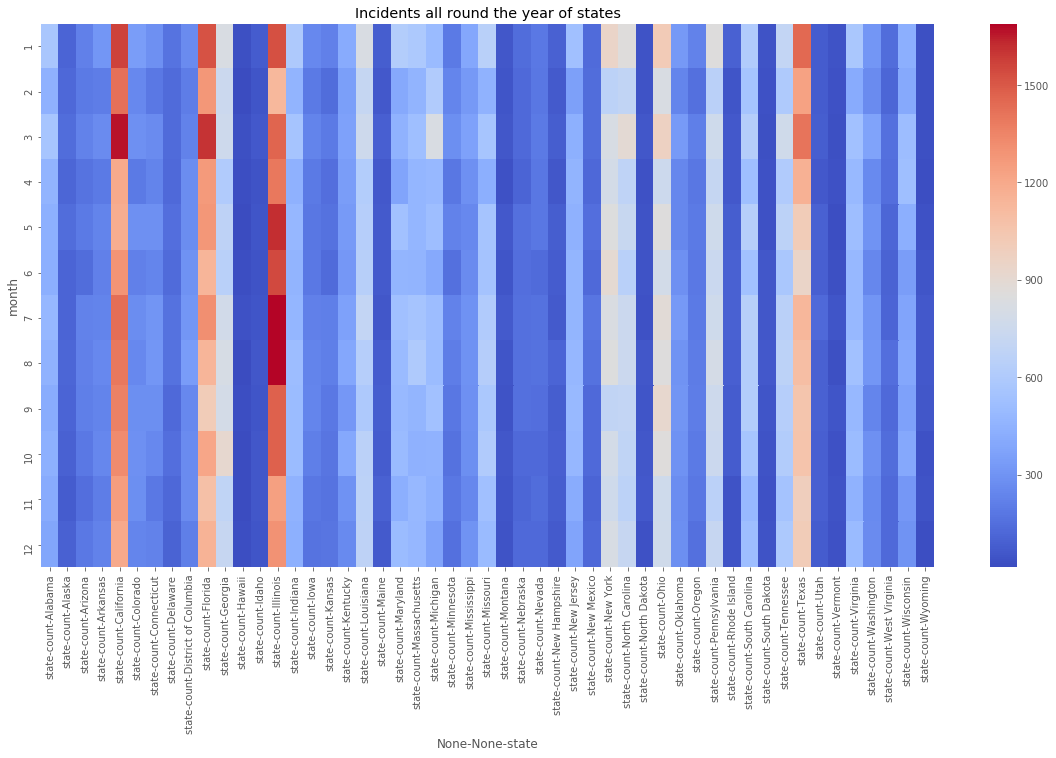

In [10]:
plt.style.use('ggplot')
df4=df.groupby(["month","state"]).aggregate({'state':['count']}).unstack()
plt.figure(figsize=(20,10))
sns.heatmap(df4,cmap='coolwarm')
plt.title('Incidents all round the year of states')
plt.show()

## Bar Graph 

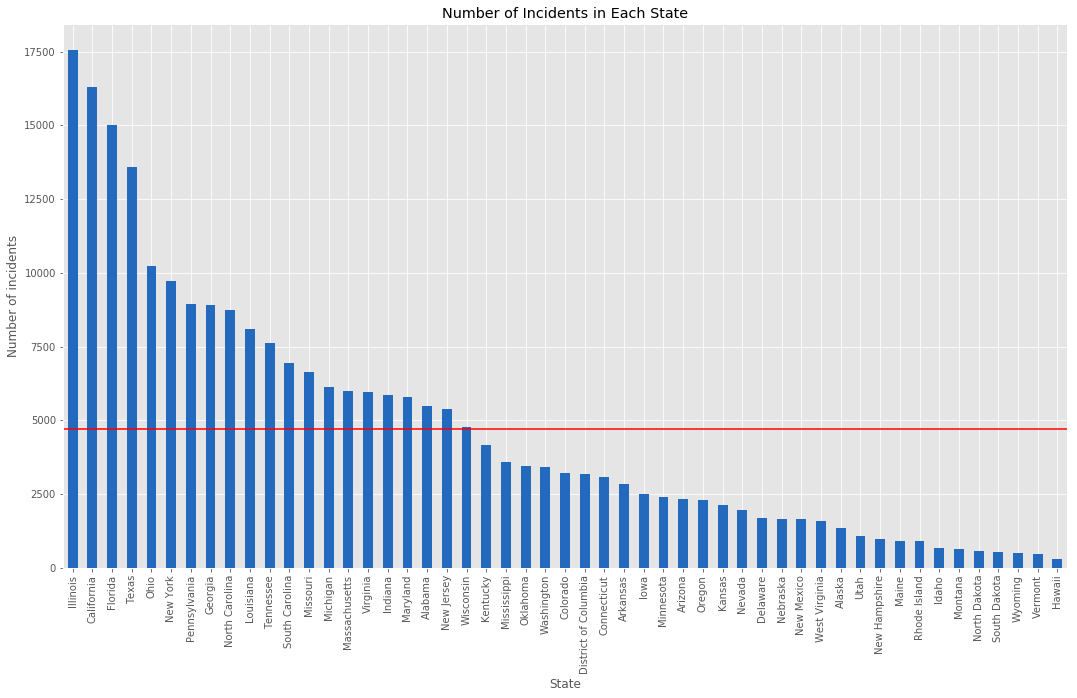

In [11]:
plot = df.state.value_counts().plot(kind='bar', title="Number of Incidents in Each State", \
                             figsize=(18,10), colormap='vlag')
plot.set_xlabel('State')
plot.set_ylabel('Number of incidents')
mean_line = plot.axhline(df.state.value_counts().mean(), color='r',\
                         label='Average Number of incidents')

plt.show()

                                                     # Conclusion
This series of visualization consist of Map, Heatmap, and bar graph. Map visualization is done with plot.ly library and is the most interactive among all visualizations in our project. Most of the code is pre-written, and certain modification and data feeding is done by team. As a conclusion this map of the United states gives the most accurate and understandable results about number of violence. Also, it is observed from the map that Illinois and then California are the states with most incidents of Gun Violence. Followed by Florida and texas. Also when you hover over state, a pop-up will give you exact numbers.We also see the national mean comes around 5000 (which is a pretty high number!).

## The incident that killed most people

In [12]:
df1=df.loc[df['n_killed'].idxmax()]
df1[['date','n_killed','state','city_or_county']]

date              2016-06-12 00:00:00
n_killed                           50
state                         Florida
city_or_county                Orlando
Name: 130448, dtype: object

## Details of incident
To read more about some specific incident, with incident ID

In [15]:
incident_id = input("Enter incident-id :")
from IPython.display import IFrame
print("Please visit:http://www.gunviolencearchive.org/incident/"+incident_id)
IFrame('http://www.gunviolencearchive.org/incident/'+incident_id, width=1200, height=300)


Enter incident-id :461105
Please visit:http://www.gunviolencearchive.org/incident/461105


## How many deaths occured in every state

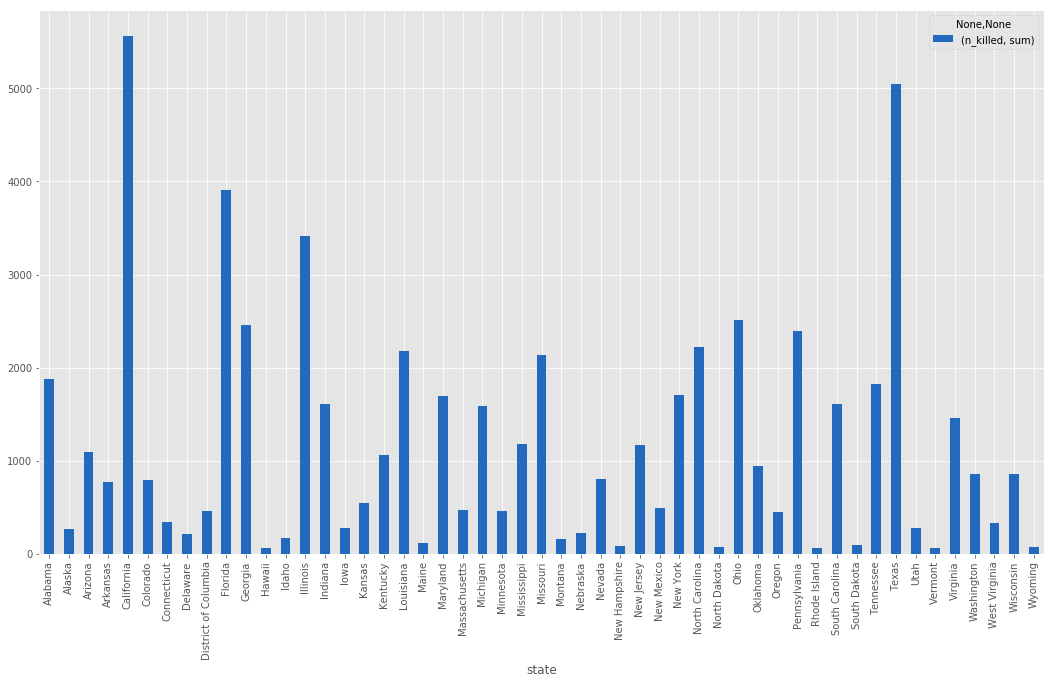

In [14]:
df2=df.groupby('state').agg({'n_killed':['sum']})
df2.plot.bar(figsize=(18,10), colormap='vlag')
plt.show()

                                                    # Conclusion
The visualization infer that Hawai, Rhode Island, Vermont had very less killings incidents while most of the people died in California(approx. 5600), Taxes(approx.5100) followed by Florida(approx.3800). These figures are self explanatory as the states with large number of killings have large number of incidence. This clearly indicate that some kind of relation exist between number of incidents and number of killings.